In [27]:
#!kaggle datasets download -d jessicali9530/celeba-dataset/
#!unzip celeba-dataset

%matplotlib inline

In [28]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [29]:
filenames = ["list_attr_celeba.csv", "list_bbox_celeba.csv", "list_eval_partition.csv", "list_landmarks_align_celeba.csv"]


pds = [pd.read_csv(filename) for filename in filenames]

In [30]:
for filename, frame in zip(filenames, pds):
    print(f"{filename}: [len={len(frame)}, shape={frame.shape}], nulls={frame.isnull().sum()}")
    print(f"{filename}: {frame.columns}")

list_attr_celeba.csv: [len=202599, shape=(202599, 41)], nulls=image_id               0
5_o_Clock_Shadow       0
Arched_Eyebrows        0
Attractive             0
Bags_Under_Eyes        0
Bald                   0
Bangs                  0
Big_Lips               0
Big_Nose               0
Black_Hair             0
Blond_Hair             0
Blurry                 0
Brown_Hair             0
Bushy_Eyebrows         0
Chubby                 0
Double_Chin            0
Eyeglasses             0
Goatee                 0
Gray_Hair              0
Heavy_Makeup           0
High_Cheekbones        0
Male                   0
Mouth_Slightly_Open    0
Mustache               0
Narrow_Eyes            0
No_Beard               0
Oval_Face              0
Pale_Skin              0
Pointy_Nose            0
Receding_Hairline      0
Rosy_Cheeks            0
Sideburns              0
Smiling                0
Straight_Hair          0
Wavy_Hair              0
Wearing_Earrings       0
Wearing_Hat            0
Wearing_Lipst

In [31]:
with open("text_labels.json", "r") as f:
    images_text_description = json.load(f)

## Available data

5 files:
1. A list of attributes about the person on each person [here](list_attr_celeba.csv).

The columns are:['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young']

2. Positions of the face [here](list_bbox_celeba.csv) ['image_id', 'x_1', 'y_1', 'width', 'height']
3. A partitioning of the data [here](list_eval_partition.csv). Maybe it is meant as training/test/validation!?
4. Marked possitions of eyes, nose, mouth [here](list_landmarks_align_celeba.csv)
5. Very important! A text description of the picture, that we then want to reuse of our context conditioned Variational Auto Encoder. We would like to have this
text describe the "context" of the picture, such that using those key words, we would get similar pictures generated.

In [32]:
summary = []

attributes_df = pds[0].drop(columns=["image_id"])

for col in attributes_df.columns:
    s = attributes_df[col]
    summary.append({
        "attribute": col,
        "mean": s.mean(),
        "variance": s.var(),
        "skew": s.skew(),
        "positive_ratio": (s == 1).mean()
    })

stats_df = pd.DataFrame(summary).set_index("attribute")
stats_df


,mean,variance,skew,positive_ratio
attribute,,,,
5_o_Clock_Shadow,-0.777728,0.395140,2.474495,0.111136
Arched_Eyebrows,-0.466039,0.782812,1.053483,0.266981
Attractive,0.025010,0.999379,-0.050036,0.512505
Bags_Under_Eyes,-0.590857,0.650891,1.464746,0.204572
Bald,-0.955113,0.087759,6.448271,0.022443
Bangs,-0.696849,0.514403,1.943217,0.151575
Big_Lips,-0.518408,0.731256,1.212471,0.240796
Big_Nose,-0.530935,0.718111,1.253084,0.234532
Black_Hair,-0.521498,0.728043,1.222386,0.239251


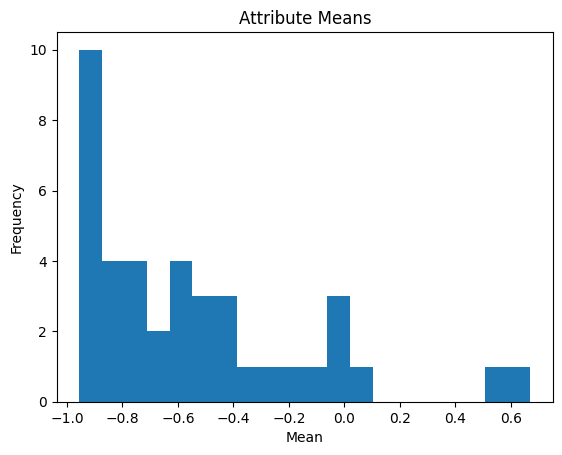

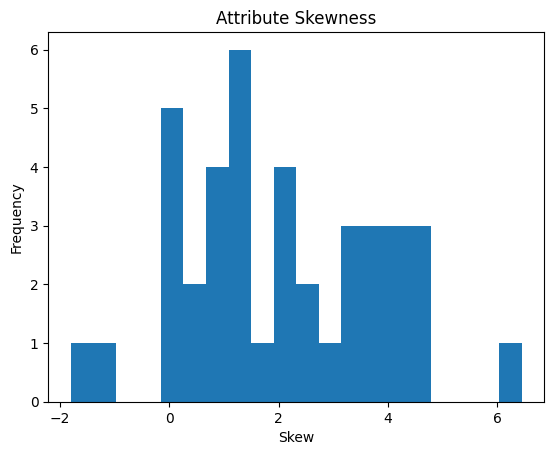

In [33]:
stats_df["mean"].plot(kind="hist", bins=20, title="Attribute Means")
plt.xlabel("Mean")
plt.show()

stats_df["skew"].plot(kind="hist", bins=20, title="Attribute Skewness")
plt.xlabel("Skew")
plt.show()


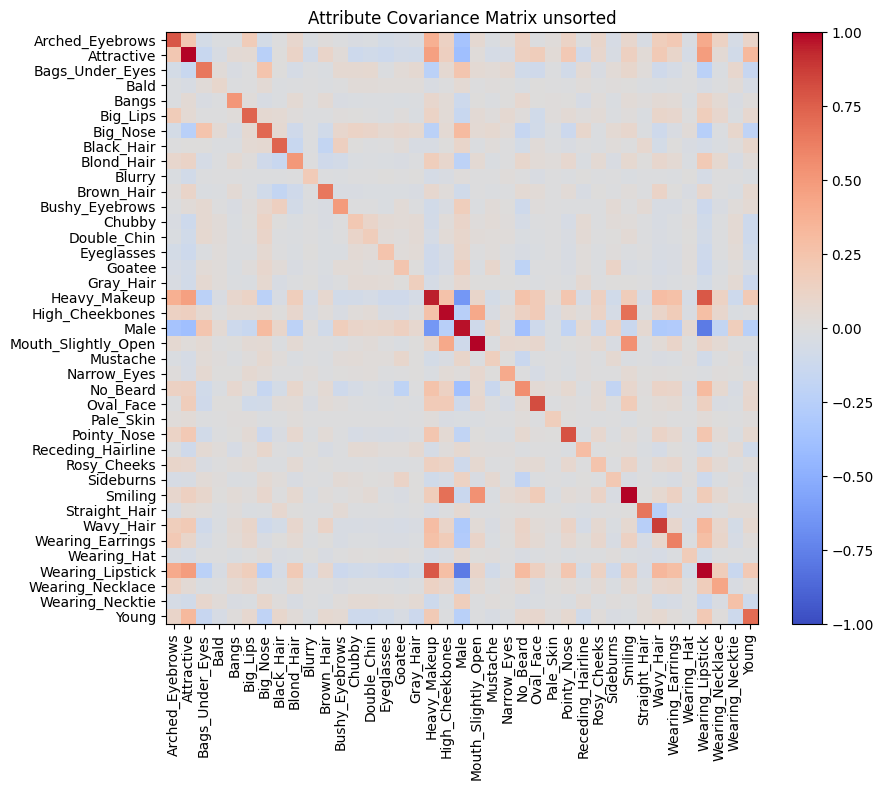

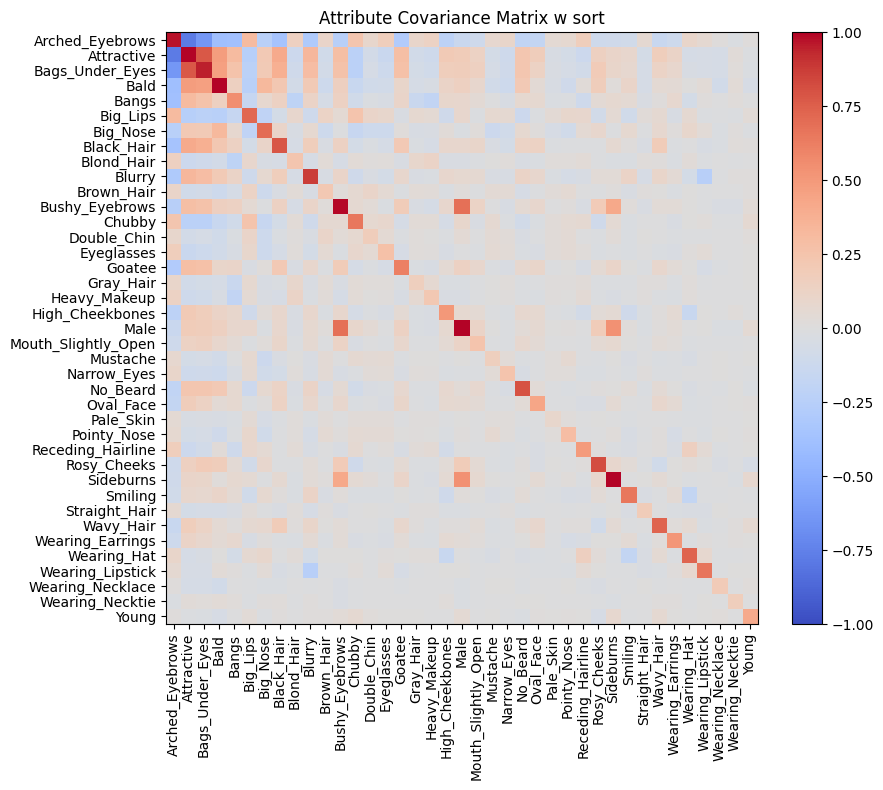

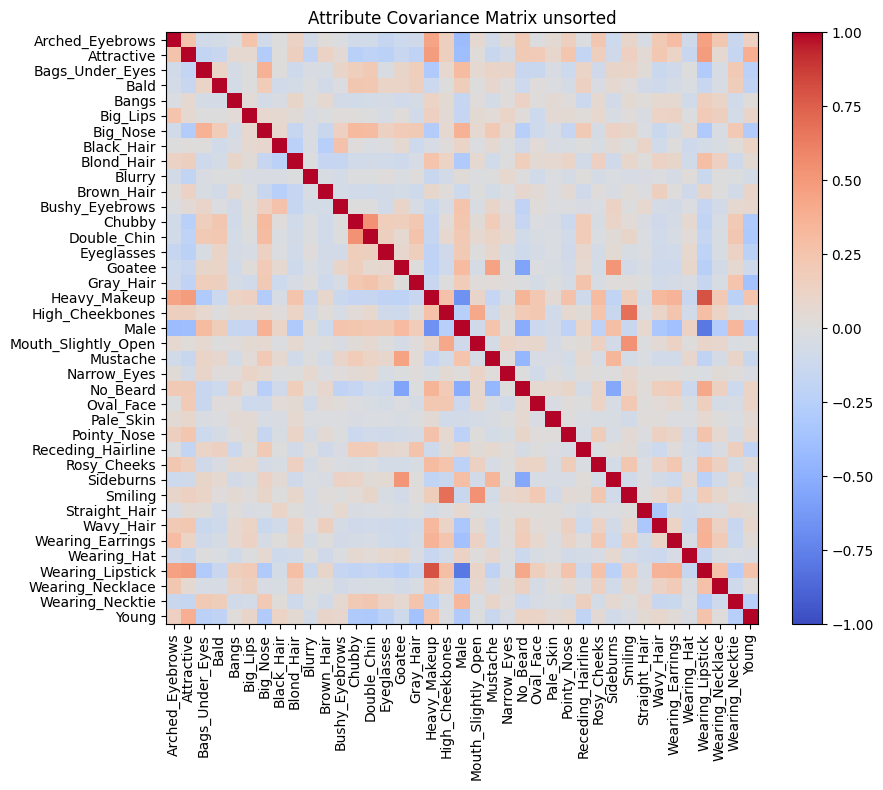

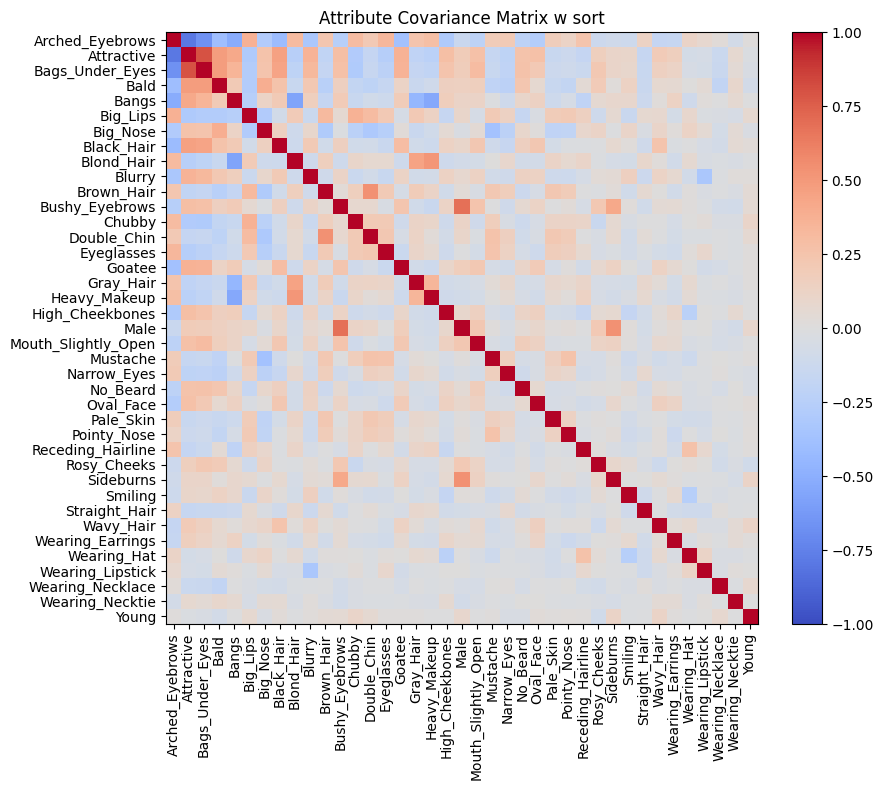

In [34]:
cov = attributes_df.iloc[:, 1:].cov()
corr = attributes_df.iloc[:, 1:].corr()

dist = 1 - np.abs(corr)

# Order by average distance
order = dist.mean(axis=0).sort_values().index

import matplotlib.pyplot as plt
import numpy as np

def plot_matrix(mat, title, vmin=None, vmax=None, cmap="coolwarm", order=None):
    fig, ax = plt.subplots(figsize=(10, 8))
    mat_to_plot = mat if order is None else mat.loc[order, order]
    im = ax.imshow(mat_to_plot.values, cmap=cmap, vmin=vmin, vmax=vmax)

    ax.set_title(title)
    ax.set_xticks(range(len(mat.columns)))
    ax.set_yticks(range(len(mat.columns)))
    ax.set_xticklabels(mat.columns, rotation=90)
    ax.set_yticklabels(mat.columns)

    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    fig.tight_layout()
    plt.show()

plot_matrix(
    cov,
    title="Attribute Covariance Matrix unsorted",
    vmin=-1,
    vmax=1
)

plot_matrix(
    cov,
    title="Attribute Covariance Matrix w sort",
    vmin=-1,
    vmax=1,
    order=order
)

plot_matrix(
    corr,
    title="Attribute Covariance Matrix unsorted",
    vmin=-1,
    vmax=1
)

plot_matrix(
    corr,
    title="Attribute Covariance Matrix w sort",
    vmin=-1,
    vmax=1,
    order=order
)

17 columns with mean i.e. not supported by data < -0.75: ['5_o_Clock_Shadow', 'Bald', 'Blurry', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Mustache', 'Narrow_Eyes', 'Pale_Skin', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Wearing_Hat', 'Wearing_Necklace', 'Wearing_Necktie']


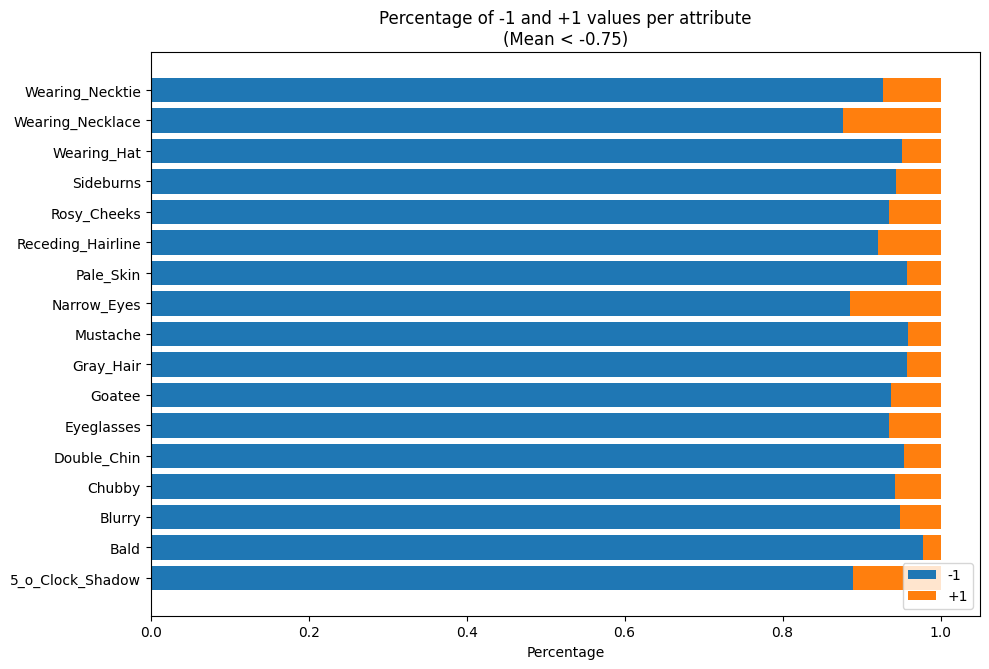

In [35]:
means = attributes_df.mean()

# Filter columns with mean < -0.75 i.e. most values are NO instead of YES.
cols_below_threshold = means[means < -0.75].index.tolist()
print(f"{len(cols_below_threshold)} columns with mean i.e. not supported by data < -0.75: {cols_below_threshold}")


# Calculate counts of -1 and +1 per column
counts = pd.DataFrame({
    "-1": (attributes_df[cols_below_threshold] == -1).sum(),
    "+1": (attributes_df[cols_below_threshold] == 1).sum()
})

# Convert counts to ratios (% of 100)
ratios = counts.divide(counts.sum(axis=1), axis=0)

# Plot stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(10, len(cols_below_threshold)*0.4))

ax.barh(ratios.index, ratios["-1"], color="tab:blue", label="-1")
ax.barh(ratios.index, ratios["+1"], left=ratios["-1"], color="tab:orange", label="+1")

ax.set_xlabel("Percentage")
ax.set_title("Percentage of -1 and +1 values per attribute\n(Mean < -0.75)")

ax.legend(loc="lower right")
plt.tight_layout()
plt.show()



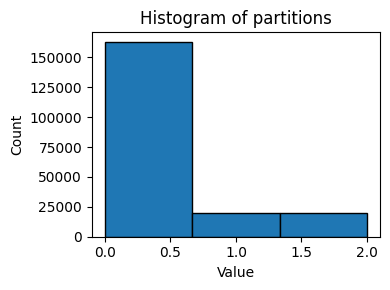

In [36]:
import matplotlib.pyplot as plt

values = pds[2].partition

plt.figure(figsize=(4, 3))
#values.value_counts().sort_index().plot(kind="bar")

plt.hist(values, bins=3, edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Histogram of partitions")
plt.tight_layout()
plt.show()


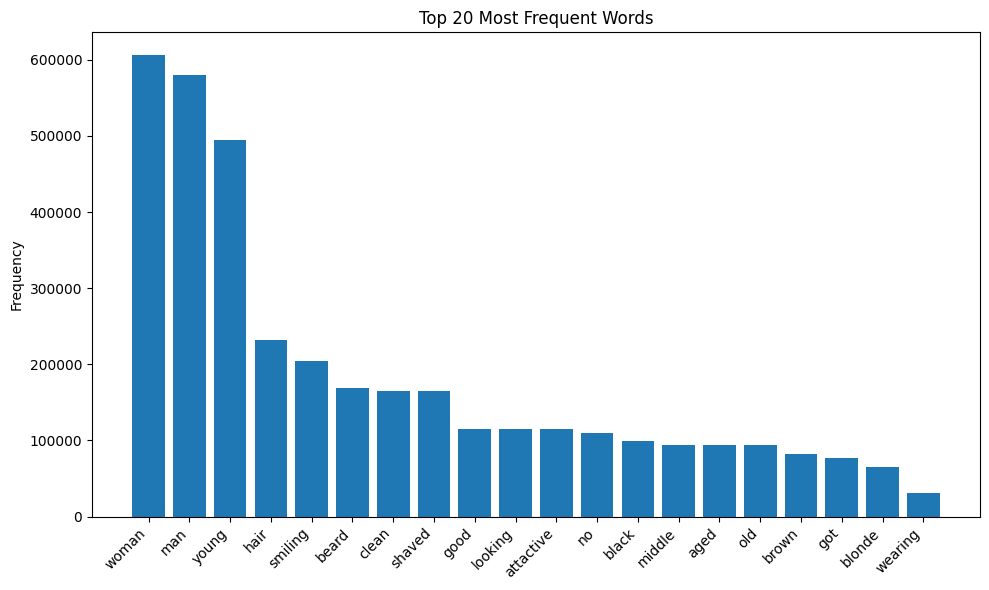

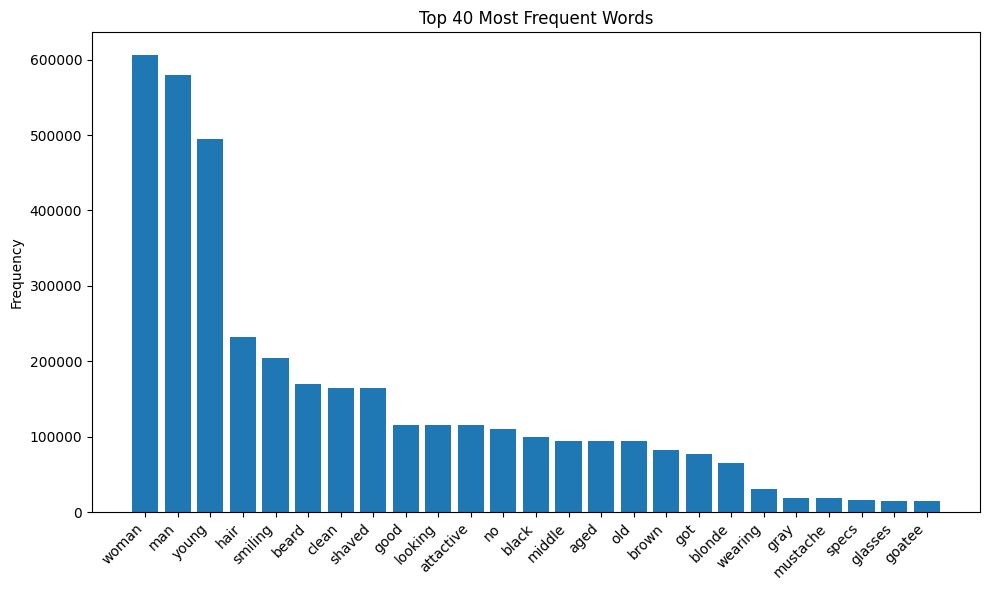

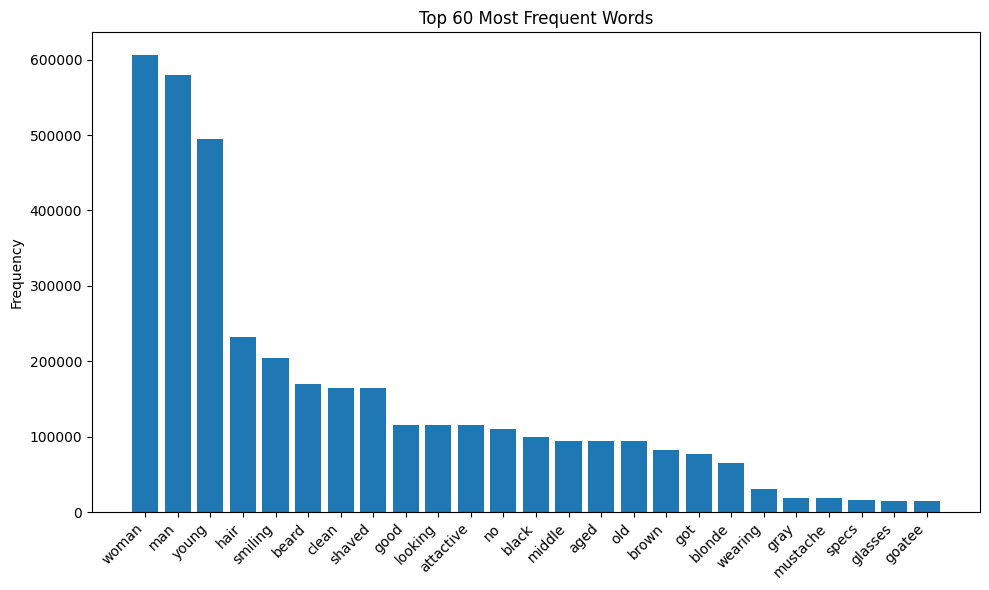

In [37]:
from collections import Counter
import re

stopwords = {
    "the", "and", "is", "in", "to", "of", "a", "for", "on",
    "with", "as", "by", "at", "an", "be", "this", "that"
}

words = []
for phrase in images_text_description.values():
    complete_text = " ".join(phrase)
    tokens = re.findall(r"\b[a-zA-Z]+\b", complete_text.lower())
    words.extend(w for w in tokens if w not in stopwords)

word_counts = Counter(words)

for top in [20, 40, 60]:
    top_x = word_counts.most_common(top)
    labels, values = zip(*top_x) if top_x else ([], [])

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values)
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Top {top} Most Frequent Words")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


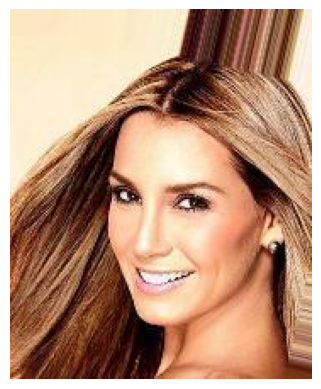

['Good Looking young woman', 'woman', 'young woman', 'woman smiling', 'Attactive woman', 'young woman smiling', 'young woman brown hair', 'Attactive young woman smiling']


In [38]:
from data_loading.image_utils import load_image, show_image
img = load_image(pds[0].image_id[0])
show_image(img)
print(images_text_description[pds[0].image_id[0]])

## Show some pictures to get a feeling of how they look

034753.jpg


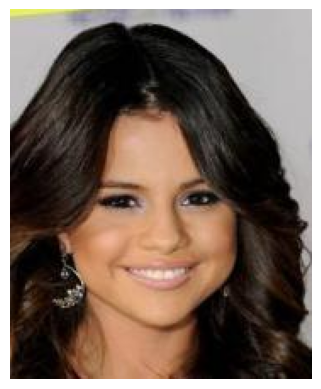

['Good Looking young woman', 'woman', 'young woman', 'woman smiling', 'Attactive woman', 'young woman smiling', 'young woman brown hair', 'Attactive young woman smiling']
132004.jpg


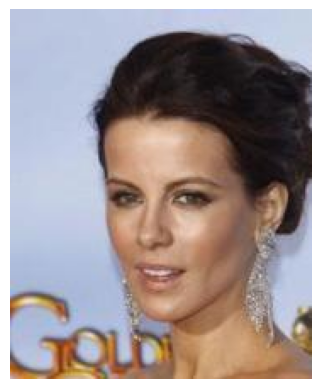

['Good Looking young woman', 'woman', 'young woman', 'woman smiling', 'Attactive woman', 'young woman smiling', 'young woman brown hair', 'Attactive young woman smiling']
061325.jpg


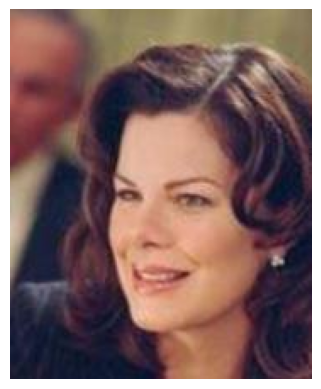

['Good Looking young woman', 'woman', 'young woman', 'woman smiling', 'Attactive woman', 'young woman smiling', 'young woman brown hair', 'Attactive young woman smiling']
106818.jpg


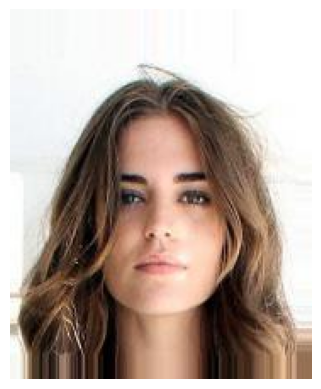

['Good Looking young woman', 'woman', 'young woman', 'woman smiling', 'Attactive woman', 'young woman smiling', 'young woman brown hair', 'Attactive young woman smiling']
053492.jpg


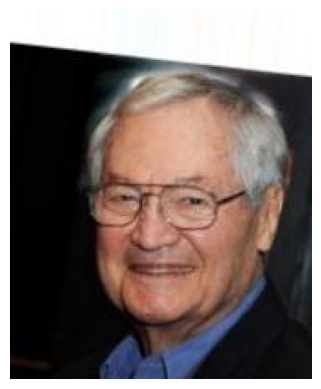

['Good Looking young woman', 'woman', 'young woman', 'woman smiling', 'Attactive woman', 'young woman smiling', 'young woman brown hair', 'Attactive young woman smiling']


In [39]:

np.random.seed(41)
for idx in np.random.choice(a = np.arange(0, len(pds[0])), replace=True, size=5):
    print(pds[0].image_id[idx])
    show_image(load_image(pds[0].image_id[idx]))
    print(images_text_description[pds[0].image_id[0]])
